In [2]:
# %load PCA.py
%matplotlib inline
import pandas as pd
import numpy as np
import re
import os
import PyPDF2
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from gensim.models.word2vec import Word2Vec



Using TensorFlow backend.


In [3]:
stemmer=SnowballStemmer("english")
stop = set(stopwords.words('english'))
def pdf_to_text(pdf):

    pdfReader = PyPDF2.PdfFileReader(pdf)
    numPage=pdfReader.numPages
    pdftext=" "
    for page in range(numPage):
        pageObj =pdfReader.getPage(page)
        text= pageObj.extractText()
        pagetext="".join(text)
        pdftext=" ".join([pagetext, pdftext])
    alltext = re.sub('[\n]', '', pdftext)
    all_words=alltext.split(" ")
    for i in range(len(all_words)):
        all_words[i]= re.sub('[^A-Za-z0-9]+', '', all_words[i])
    affterstemmer=[]
    for word in all_words:
        affterstemmer.append(stemmer.stem(word))
    
    afterstop=[]
    for word in affterstemmer:
        if word not in stop:
            afterstop.append(word)
    return " ".join(afterstop)
THIS_FOLDER = os.path.dirname(os.path.abspath("Word2Vec.ipynb"))


## Geting ready the training data
data = pd.read_csv('resumes.csv')




In [4]:
X_train=[]
for i in data['path']:
    my_file = os.path.join(THIS_FOLDER, i)
    pdf = open(my_file, 'rb')
    X_train.append(pdf_to_text(pdf))



In [5]:
word2vec = {}

In [6]:
x_by_words=[]
for i in X_train:
    x_by_words.append(i.split())

In [20]:
s = 1000

model = Word2Vec(x_by_words, size=s, min_count=5, workers=10)
w2v = {w: vec for w, vec in zip(model.wv.index2word, model.wv.syn0)}
vocab = model.wv.index2word
train_w2v = []
for i in x_by_words:
    ar =[0 for i in range(s)]
    for j in i:
        if j in vocab:
            ar+=w2v[j]
    train_w2v.append(ar)

In [21]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(train_w2v, data['succes'], test_size = .001, random_state = 32)

In [11]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.cross_validation import cross_val_score

In [12]:
clfs=[GaussianNB(),SGDClassifier(),LogisticRegression(),
      DecisionTreeClassifier(),RandomForestClassifier(),
      GradientBoostingClassifier(),AdaBoostClassifier()]
for c in clfs:
    clf = c.fit(x_train,y_train)
    print(np.mean(cross_val_score(clf, train_w2v, data['succes'], cv=3)))



0.746811261976
0.81581731617
0.934285546347
0.875036736613
0.887527185094
0.899988244284
0.896843590196


In [13]:

clf = LogisticRegression()
cvs = cross_val_score(clf, x_train, y_train, cv=5)
print(cvs)
print(np.mean(cvs))

[ 0.92307692  0.96875     0.90625     0.96825397  0.92063492]
0.937393162393


In [15]:

from sklearn.svm import SVC
cvf_rbf= SVC(kernel = 'rbf', C= 1e3)
cvf_linear= SVC(kernel = 'linear', C= 1e3)
cvf_poly= SVC(kernel = 'poly', C= 1e3) 
cvf_sigmoid= SVC(kernel = 'sigmoid', C= 1e3) 

svc_clf= [cvf_rbf,cvf_linear,cvf_poly,cvf_sigmoid]

for c in svc_clf:
    clf = c.fit(x_train,y_train)
    print(np.mean(cross_val_score(clf, train_w2v, data['succes'], cv=3)))





0.824927996238
0.943719508611
0.909363427967
0.549697290307


In [22]:
clf = SVC(kernel = 'linear', C= 1e3)
cvs = cross_val_score(clf, x_train, y_train, cv=5)
print(cvs)
print(np.mean(cvs))

[ 0.92307692  0.953125    0.921875    0.93650794  0.9047619 ]
0.927869352869


In [23]:
from sklearn.model_selection import GridSearchCV
svc = SVC(kernel = 'linear', C= 1e3)
params = {'C': [1, 10, 100, 1000], 'kernel': ['linear']}
clf = GridSearchCV(svc,params,scoring='accuracy')
clf.fit(x_train,y_train)

SyntaxError: invalid character in identifier (<ipython-input-23-6df232250e2f>, line 4)

In [42]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(train_w2v, data['succes'], test_size = .001, random_state = 32)

In [43]:
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC

train_sizes, train_scores, test_scores = learning_curve(
    SVC(kernel='linear'), x_train, y_train, train_sizes=[0.1 ,0.2 ,0.3 ,0.4 ,0.5 ,0.6 ,0.7 ,0.8 ,0.9 , 1.], cv=5)
         


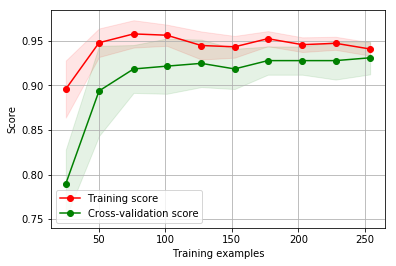

In [44]:

plt.xlabel("Training examples")
plt.ylabel("Score")
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")
plt.show()